In [131]:
import pandas as pd
news=pd.read_csv('news.csv')

In [132]:
news['date'] = pd.to_datetime(news['date'])

In [133]:
news.head()

,title,date,press,text
0,Compendium of Writings About the 2024 Election...,2024-10-31,reason,"As election day approaches, here are links to ..."
1,Newspaper Endorsements Die in Daylight,2024-10-31,reason,It sure has been a banner week for the triple ...
2,"Dave Smith, David Stockman, and Jacob Grier: W...",2024-10-31,reason,HD Video DownloadIs this the most important el...
3,Live On Election Eve With The Reason Roundtable!,2024-10-31,reason,Will Election 2024 result in an orderly transf...
4,"To Get Through the Election, Use Ozempic",2024-10-30,reason,The two major party candidates provide ample r...


In [134]:
news['press'].unique()

array(['reason', 'cbs', 'NPR'], dtype=object)

In [135]:
news.loc[news['press'] == 'reason', 'bias'] = 'Right' #Trump bias
news.loc[news['press'] == 'NPR', 'bias'] = 'Center'
news.loc[news['press'] == 'cbs', 'bias'] = 'Left' #Harris bias

In [136]:
news['bias'].sample(5)

,bias
476,Left
800,Center
440,Left
354,Left
193,Left


In [137]:
news.groupby('bias').count()

,title,date,press,text
bias,,,,
Center,312,312,312,312
Left,350,350,350,350
Right,192,192,192,190


<Axes: xlabel='Political Bias'>

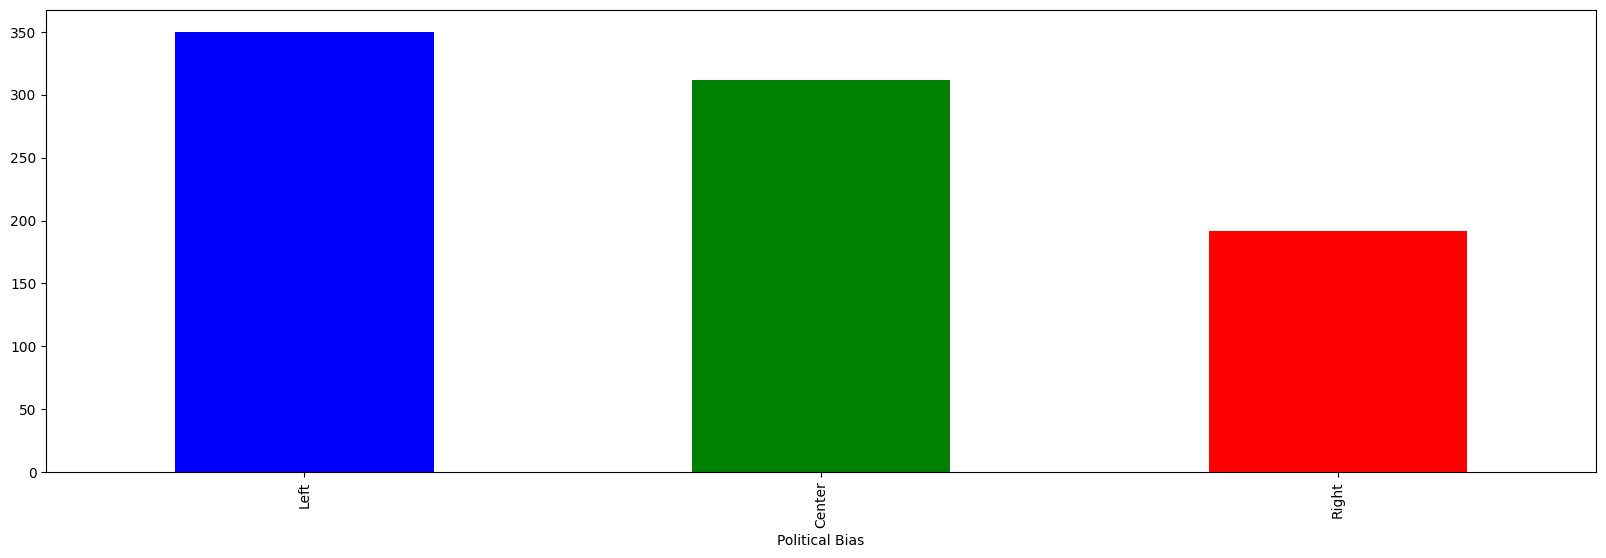

In [138]:
bias_counts = news.groupby('bias').count()['title']

# 원하는 순서로 정렬
order = ['Left', 'Center', 'Right']
bias_counts = bias_counts.reindex(order)

# 그래프 출력
bias_counts.plot(kind='bar', xlabel='Political Bias', color=['b', 'g', 'r'])

In [139]:
def count_mentions(text, keyword):
    if isinstance(text, str):
        return text.lower().count(keyword)
    return 0

news['trump_count'] = news['text'].apply(lambda x: count_mentions(x, 'trump'))
news['harris_count'] = news['text'].apply(lambda x: count_mentions(x, 'harris'))

In [140]:
count=news.groupby(['bias'])[['trump_count','harris_count']].sum()

<Axes: xlabel='Political Bias'>

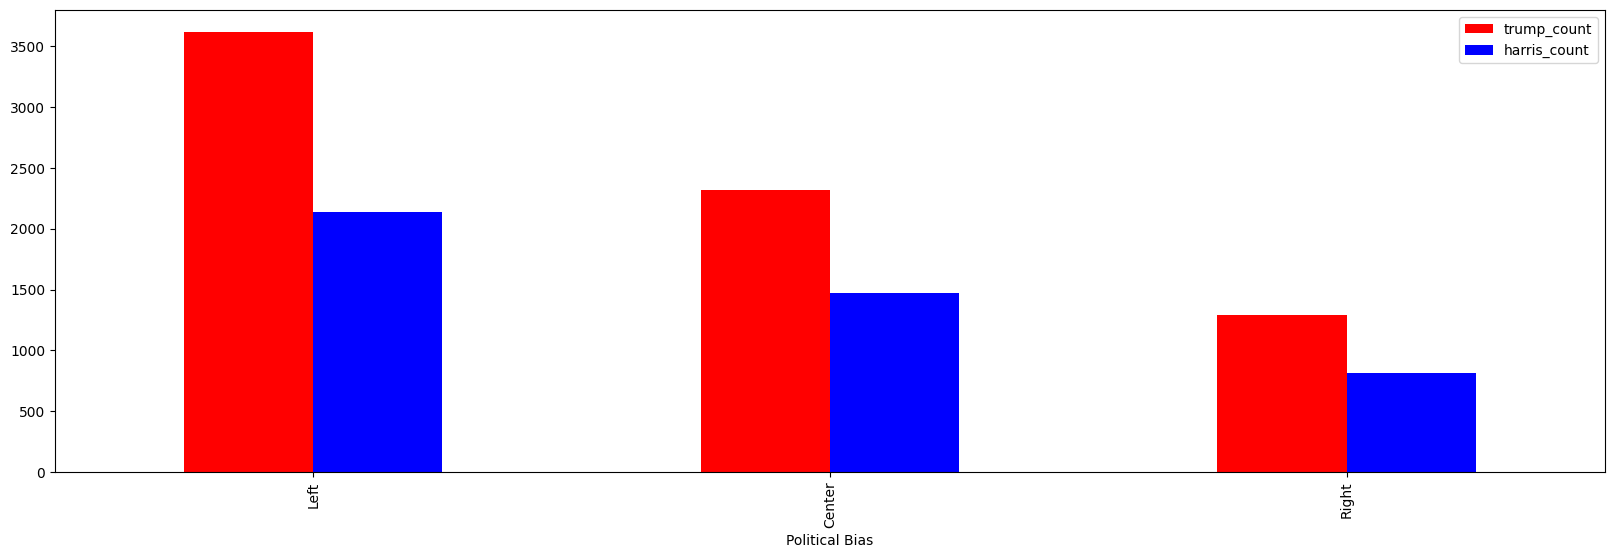

In [141]:
order = ['Left', 'Center', 'Right']
count = count.reindex(order)
count.plot(kind='bar',xlabel='Political Bias',color=('r','b'))

In [142]:
date_count=news.groupby(['date'])[['trump_count','harris_count']].sum()
date_count=date_count.T
date_count['name']=['Trump','Harris']
date_count.set_index('name', inplace=True)

In [143]:
date_count

date,2024-08-22,2024-08-23,2024-08-26,2024-08-27,2024-08-28,2024-08-29,2024-08-30,2024-08-31,2024-09-01,2024-09-02,...,2024-10-24,2024-10-25,2024-10-26,2024-10-27,2024-10-28,2024-10-29,2024-10-30,2024-10-31,2024-11-01,2024-11-02
name,,,,,,,,,,,,,,,,,,,,,
Trump,3,22,32,41,75,130,91,22,27,13,...,224,186,75,254,203,325,224,43,154,31
Harris,1,40,18,33,15,90,56,14,14,17,...,202,71,44,145,120,179,106,39,95,37


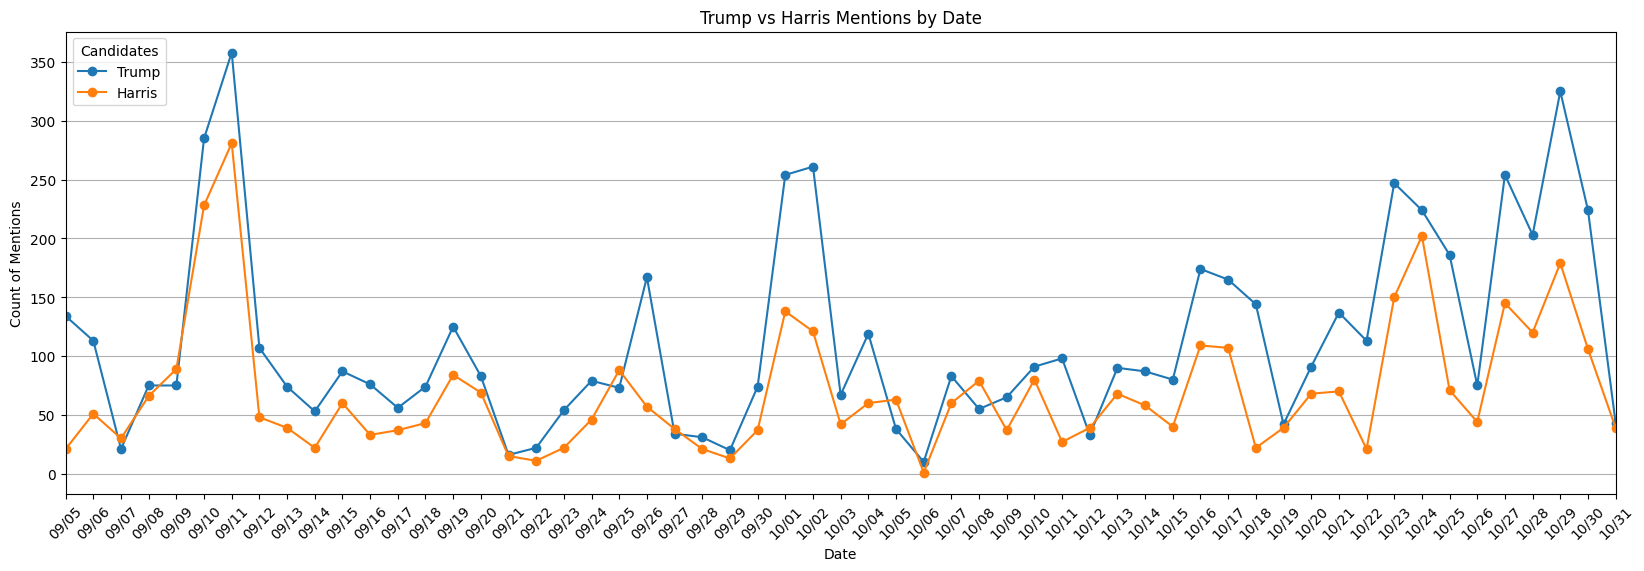

In [146]:
import matplotlib.pyplot as plt
import pandas as pd

date_count.columns = pd.to_datetime(date_count.columns, format='%m/%d')

date_range = pd.date_range(start='2024-09-05', end='2024-10-31')

%matplotlib inline
from IPython.core.pylabtools import figsize
figsize(20, 6)
date_count.T.reindex(date_range).plot(kind='line', marker='o')  # 선 그래프 그리기

plt.title('Trump vs Harris Mentions by Date')
plt.xlabel('Date')
plt.ylabel('Count of Mentions')

plt.xticks(ticks=date_range, labels=date_range.strftime('%m/%d'), rotation=45)

plt.grid(axis='y')
plt.legend(title='Candidates')

plt.show()  #

<Figure size 1200x600 with 0 Axes>

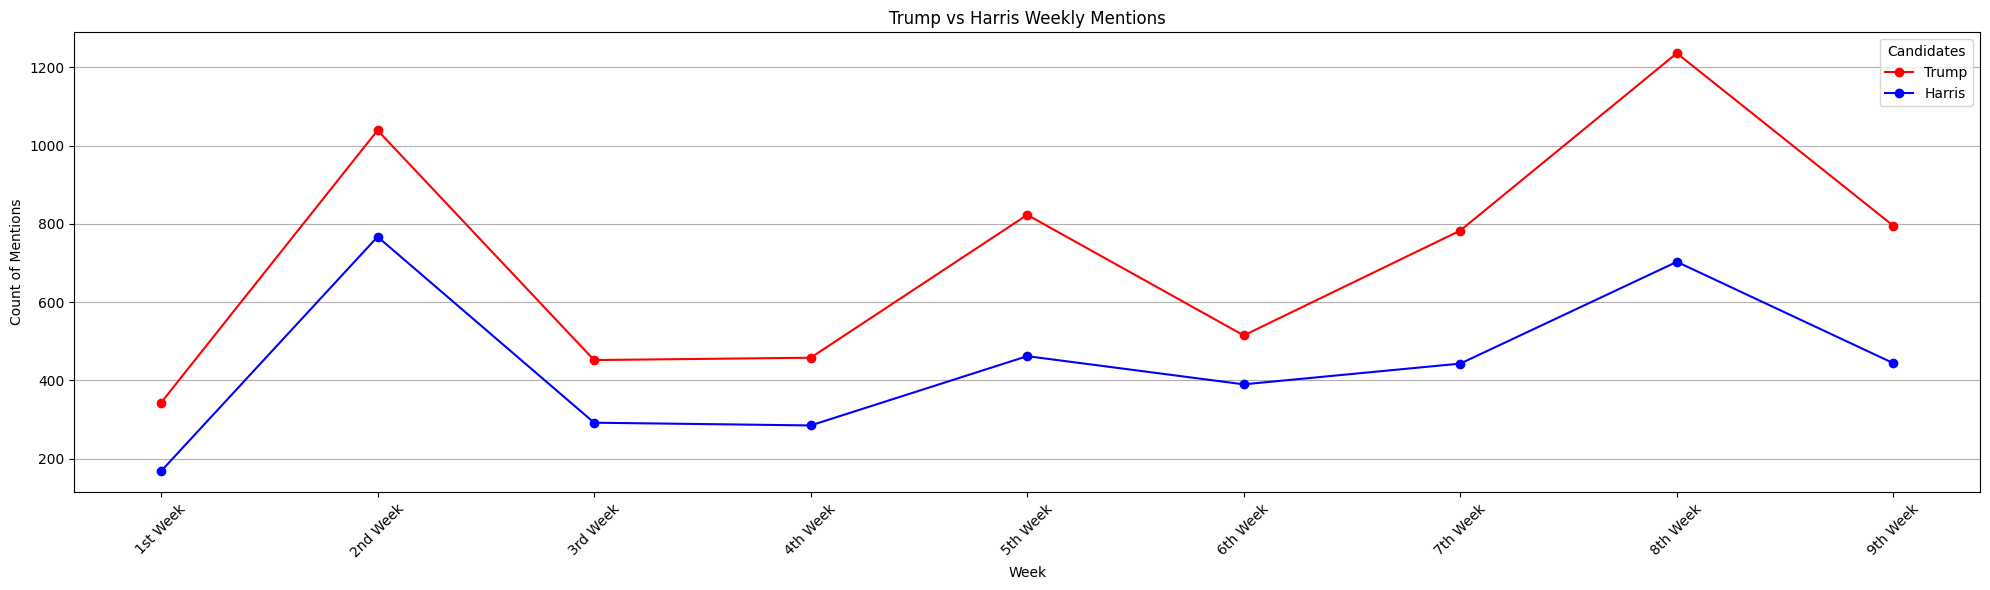

In [148]:
import matplotlib.pyplot as plt
import pandas as pd

date_count.columns = pd.to_datetime(date_count.columns, format='%Y-%m-%d')

date_count_weekly = date_count.T.reindex(date_range, fill_value=0).resample('W').sum().T

weeks = [f"{i+1}st Week" if i == 0 else f"{i+1}nd Week" if i == 1 else f"{i+1}rd Week" if i == 2 else f"{i+1}th Week" for i in range(date_count_weekly.shape[1])]
date_count_weekly.columns = weeks

plt.figure(figsize=(12, 6))
colors=['r','b']
date_count_weekly.T.plot(kind='line', marker='o',color=colors)

plt.title('Trump vs Harris Weekly Mentions')
plt.xlabel('Week')
plt.ylabel('Count of Mentions')

plt.xticks(rotation=45)

plt.grid(axis='y')
plt.legend(title='Candidates')

plt.tight_layout()
plt.show()


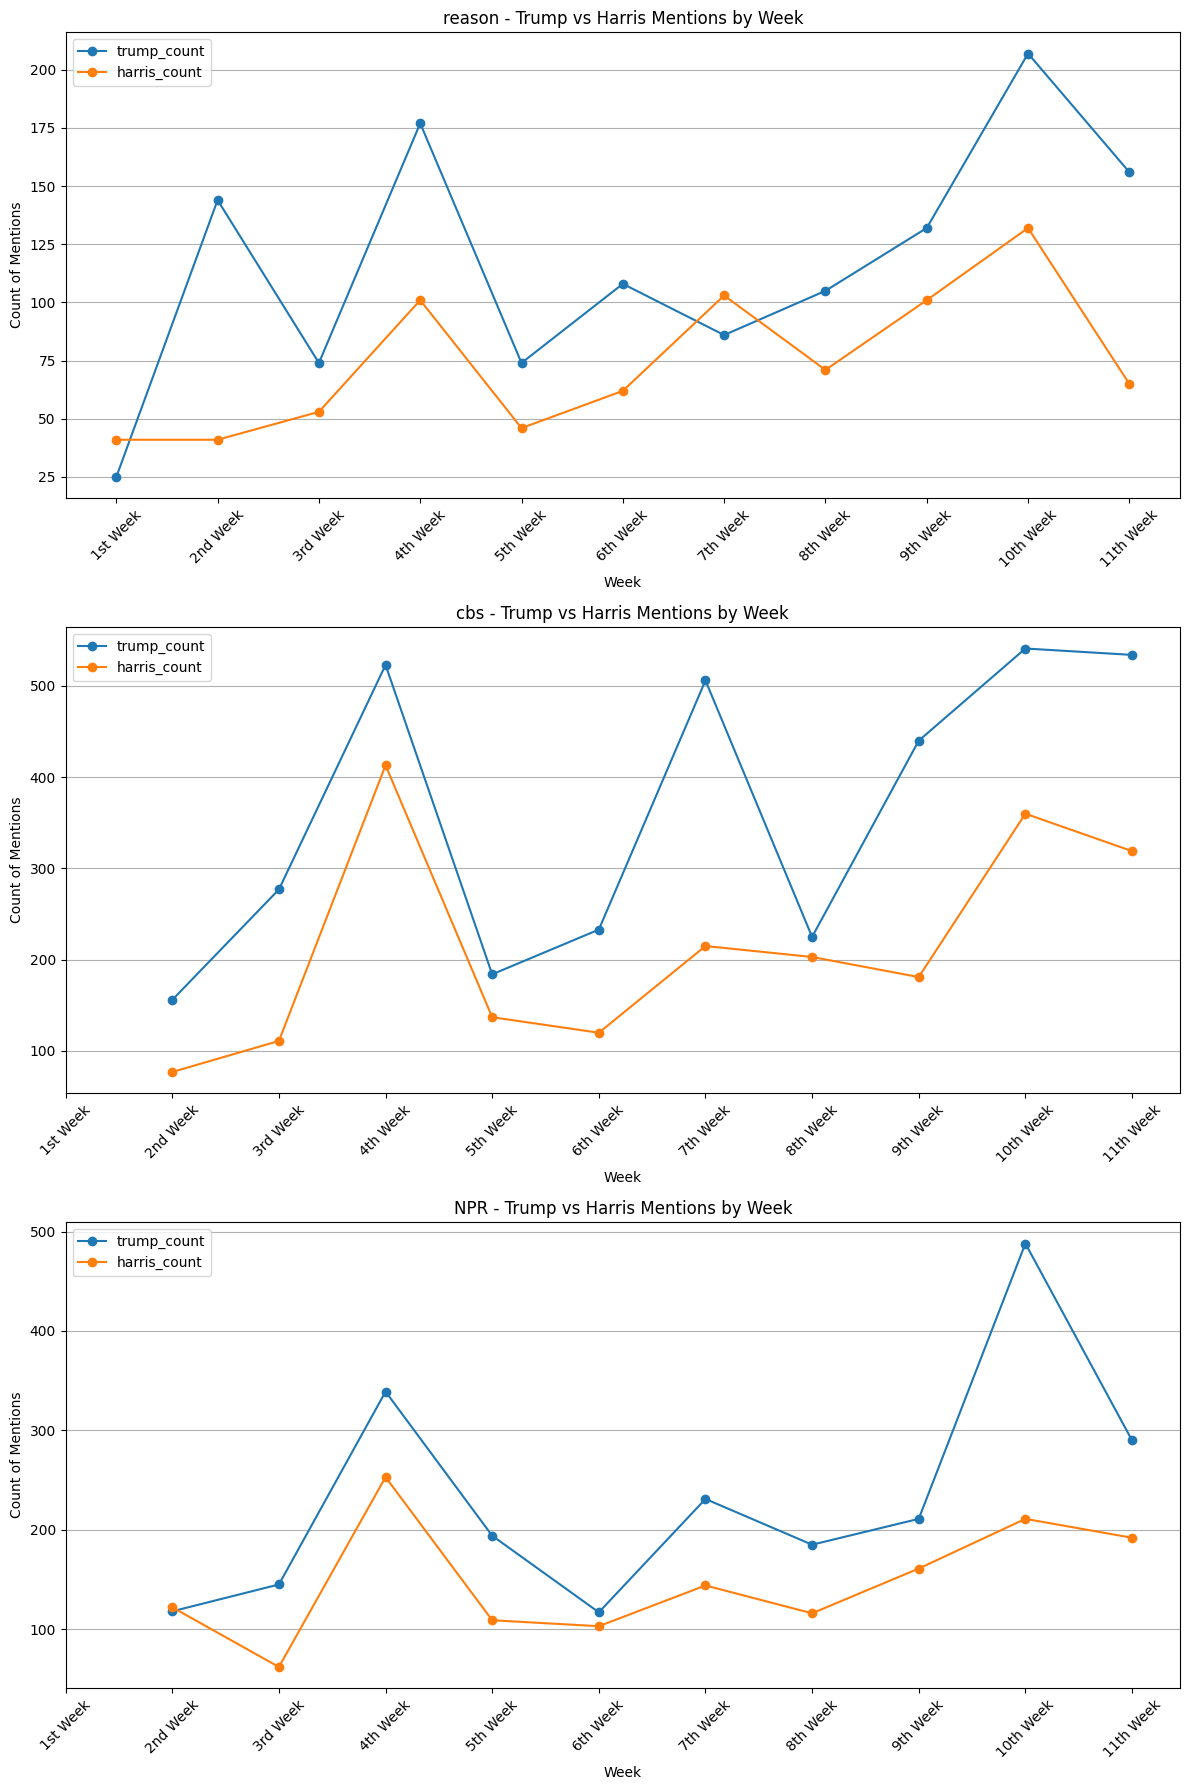

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

news['date'] = pd.to_datetime(news['date'], format='%B %d, %Y')

weekly_press_counts = news.groupby([pd.Grouper(key='date', freq='W'), 'press'])[['trump_count', 'harris_count']].sum().unstack()

weeks = [f"{i+1}st Week" if i == 0 else f"{i+1}nd Week" if i == 1 else f"{i+1}rd Week" if i == 2 else f"{i+1}th Week" for i in range(weekly_press_counts.shape[0])]
weekly_press_counts.index = weeks

presses = news['press'].unique()


fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 18))

for i, press in enumerate(presses):
    press_data = weekly_press_counts.xs(press, level='press', axis=1)

    press_data.plot(kind='line', marker='o', ax=axes[i])

    axes[i].set_title(f'{press} - Trump vs Harris Mentions by Week')
    axes[i].set_xlabel('Week')
    axes[i].set_ylabel('Count of Mentions')
    axes[i].grid(axis='y')
    axes[i].set_xticks(range(len(weeks)))
    axes[i].set_xticklabels(weeks, rotation=45)

plt.tight_layout()
plt.show()

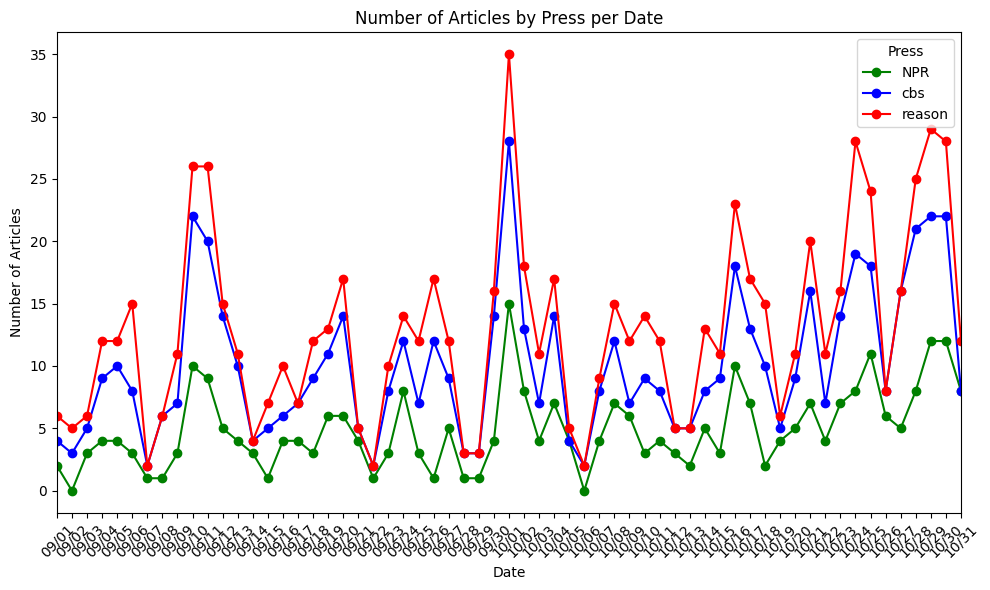

In [83]:
grouped = news.groupby(['date', 'press']).size().reset_index(name='count')
date_range = pd.date_range(start='2024-09-01', end='2024-10-31')
pivot_table = grouped.pivot(index='date', columns='press', values='count').fillna(0)

%matplotlib inline
from IPython.core.pylabtools import figsize
figsize(20, 6)

colors = ['g','b','r']
pivot_table.reindex(date_range).plot(kind='line',marker='o', stacked=True, figsize=(10, 6),color=colors)
plt.title('Number of Articles by Press per Date')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.legend(title='Press')
plt.xticks(ticks=date_range, labels=date_range.strftime('%m/%d'), rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

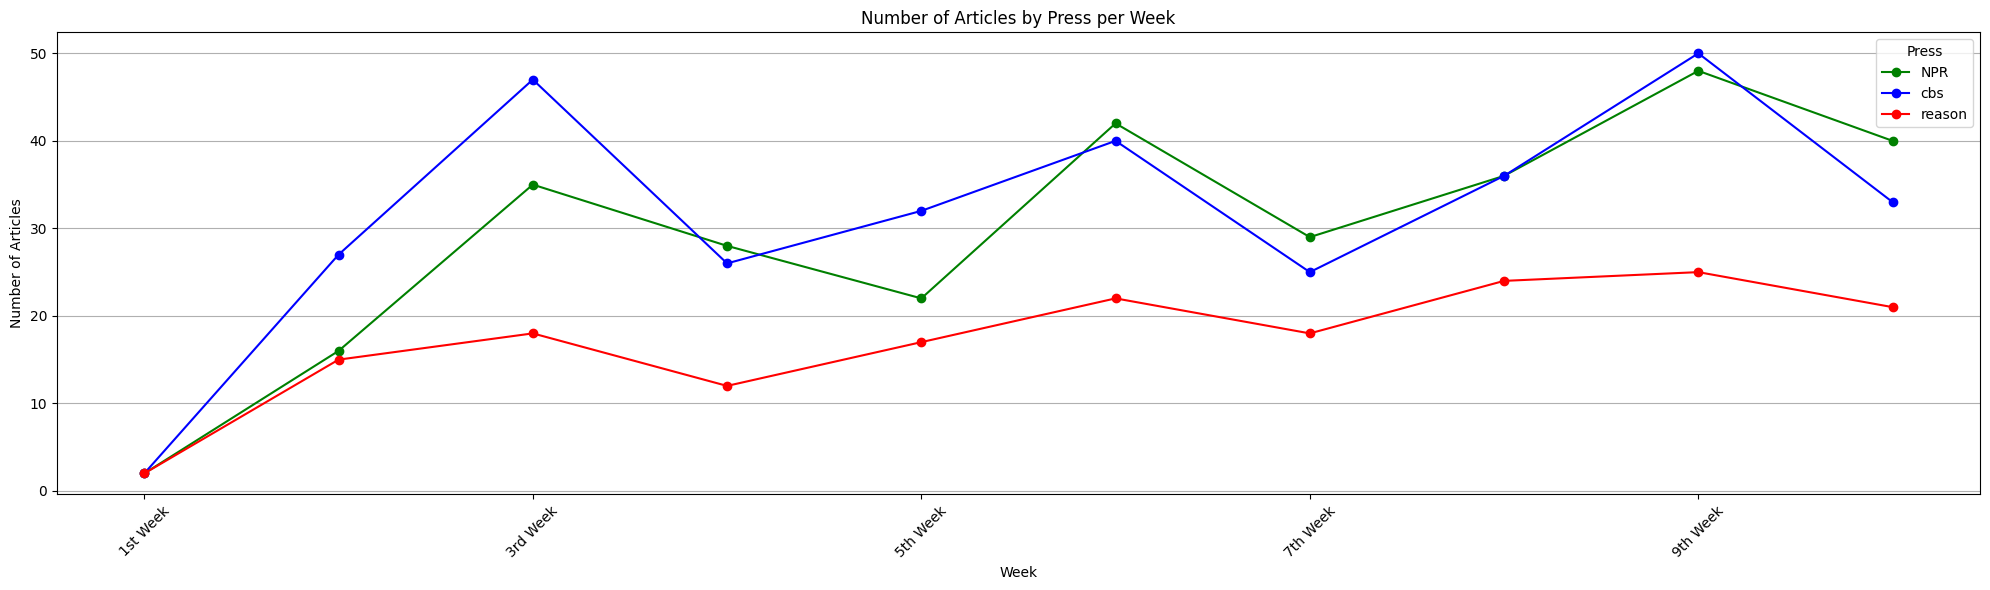

In [113]:
news_grouped = news.groupby(['date', 'press']).size().reset_index(name='count')
date_range = pd.date_range(start='2024-09-01', end='2024-10-31')

# 피벗 테이블 생성
date_count = news_grouped.pivot(index='date', columns='press', values='count').fillna(0)
date_count = date_count.reindex(date_range, fill_value=0)

# 주간 집계로 변환
date_count_weekly = date_count.resample('W').sum()

# 주간 이름 설정
weeks = [f"{i+1}st Week" if i == 0 else f"{i+1}nd Week" if i == 1 else f"{i+1}rd Week" if i == 2 else f"{i+1}th Week" for i in range(date_count_weekly.shape[0])]
date_count_weekly.index = weeks

# 그래프 그리기
plt.figure(figsize=(12, 6))
colors=['g','b','r']
date_count_weekly.plot(kind='line', marker='o',color=colors)

plt.title('Number of Articles by Press per Week')
plt.xlabel('Week')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(title='Press')
plt.tight_layout()
plt.show()

In [85]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(news['text'].fillna(''))

word_counts = X.toarray().sum(axis=0)

words = vectorizer.get_feature_names_out()

word_freq = pd.DataFrame({'word': words, 'count': word_counts})

top_10_words = word_freq.sort_values(by='count', ascending=False).head(10)

print(top_10_words)

            word  count
21206      trump   7180
18067       said   5194
9641      harris   4399
15980  president   3467
7027    election   3019
19608      state   2292
22238     voters   2039
3375    campaign   1999
15224     people   1960
14026       news   1527


In [90]:
import nltk
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [91]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))

def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

lemmatizer = WordNetLemmatizer()

def preprocess(text):
    words = word_tokenize(text.lower())
    pos_tagged_words = pos_tag(words)
    lemmatized_words = [lemmatizer.lemmatize(word, get_wordnet_pos(pos)) for word, pos in pos_tagged_words if word.isalpha() and word not in stop_words]
    return ' '.join(lemmatized_words)

news['processed_text'] = news['text'].fillna('').apply(preprocess)

custom_stop_words = ['trump', 'harris','say','would','make','also']

vectorizer = CountVectorizer(stop_words=custom_stop_words)

X = vectorizer.fit_transform(news['processed_text'])

word_counts = X.toarray().sum(axis=0)

words = vectorizer.get_feature_names_out()

word_freq = pd.DataFrame({'word': words, 'count': word_counts})
top_10_words = word_freq.sort_values(by='count', ascending=False).head(10)

In [92]:
top_10_words

,word,count
14373,state,3454
11746,president,3426
4780,election,3346
16435,voter,2530
16432,vote,2415
2086,campaign,2200
11212,people,1930
6375,go,1658
16949,year,1607
10657,one,1597


In [93]:
!pip install squarify

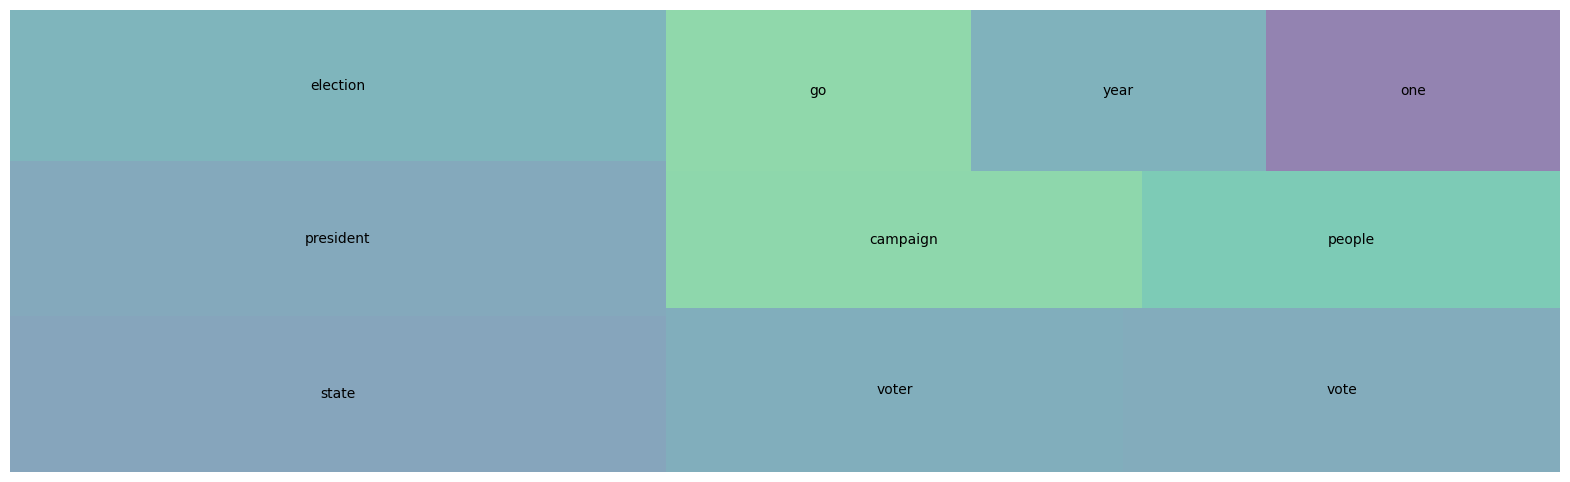

In [94]:
import squarify

squarify.plot(sizes=top_10_words['count'], label=top_10_words['word'],alpha=0.59)
plt.axis('off')
plt.savefig('ww.jpg')
plt.show();

In [95]:
import re

def preprocess_text(text):
    if pd.isnull(text):
        return ''

    text = re.sub(r'[^a-zA-Z\s]', '', text)

    words = word_tokenize(text.lower())
    pos_tagged_words = pos_tag(words)
    lemmatized_words = [lemmatizer.lemmatize(word, get_wordnet_pos(pos)) for word, pos in pos_tagged_words if word.isalpha() and word not in stop_words]
    return ' '.join(lemmatized_words)


news['cleaned_text'] = news['text'].apply(preprocess_text)

custom_stop_words = ['trump', 'harris','say','would','make','also','cbs','go']
vectorizer = CountVectorizer(stop_words=custom_stop_words)

bias_word_counts = {}

for bias in news['bias'].unique():
    filtered_text = news[news['bias'] == bias]['cleaned_text']
    X = vectorizer.fit_transform(filtered_text)
    word_counts = X.toarray().sum(axis=0)
    words = vectorizer.get_feature_names_out()

    bias_word_counts[bias] = pd.DataFrame({'word': words, 'count': word_counts})


for bias, df in bias_word_counts.items():
    print(f"Top words for bias '{bias}':")
    top_words = df.sort_values(by='count', ascending=False).head(10)
    print(top_words)
    print("\n")

Top words for bias 'Right':
            word  count
12115      state    499
9884   president    447
9360     percent    382
8842         one    380
14439       year    367
9345      people    362
9646      policy    361
8450         new    345
13934       vote    325
508     american    315


Top words for bias 'Left':
            word  count
12253  president   1864
15100      state   1544
4944    election   1481
2087    campaign   1156
17330      voter   1138
10497       news   1036
17295       vote   1016
6135      former    866
11585     people    813
13541      right    746


Top words for bias 'Center':
             word  count
3274     election   1525
9997        state   1388
11439       voter   1141
11428        vote   1119
8197    president   1083
1408     campaign    759
7810       people    725
11879        year    636
7416          one    614
8872   republican    597


